# <u>**Part 8**

In [39]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

### **Exercise 71**


Load the pca1.csv file into the df DataFrame. Perform dimensional reduction with PCA and three principal components using the scikit-learn package and the PCA class.

In response, print the percentage of the variance explained by these components (as DataFrame object).

In [12]:
df = pd.read_csv('pca1.csv')
data = df.values

In [13]:
df.head(5)

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32


In [14]:
data

array([[14.23,  1.71,  2.43, ...,  0.28,  2.29,  5.64],
       [13.2 ,  1.78,  2.14, ...,  0.26,  1.28,  4.38],
       [13.16,  2.36,  2.67, ...,  0.3 ,  2.81,  5.68],
       ...,
       [13.27,  4.28,  2.26, ...,  0.43,  1.35, 10.2 ],
       [13.17,  2.59,  2.37, ...,  0.53,  1.46,  9.3 ],
       [14.13,  4.1 ,  2.74, ...,  0.56,  1.35,  9.2 ]])

In [15]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [16]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)

In [17]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})

In [18]:
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.338023,0.338023,1
1,0.199678,0.537701,2
2,0.133415,0.671117,3


### **Exercise 72**

Load the pca1.csv file into the df DataFrame. Keep the number of components that explain 95% of the variance in the given dataset.

In response, print the number of components of this analysis.

In [19]:
df = pd.read_csv('pca1.csv')
data = df.values

In [20]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [21]:
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_std)

In [22]:
print(f'Number of components: {pca.n_components_}')

Number of components: 8


### **Exercise 73**

A transactions DataFrame (transaction database) containg data in a certain grocery store is given:

```
        products
1       bread eggs
2       bread eggs milk
3       milk cheese
4       bread butter cheese
5       eggs milk
6       bread milk butter cheese

```

Each row contains products purchased by one customer. Split each row of the products column by a space character and extend to the DataFrame object. The object should have four columns (maximum number of products in one transaction). In the missing places put None as shown below and assign to expanded variable.

In response, print the expanded variable to the console.

In [23]:
data = {
    "products": [
        "bread eggs",
        "bread eggs milk",
        "milk cheese",
        "bread butter cheese",
        "eggs milk",
        "bread milk butter cheese",
    ]
}

transactions = pd.DataFrame(data=data, index=range(1, 7))

In [25]:
transactions

,products
1,bread eggs
2,bread eggs milk
3,milk cheese
4,bread butter cheese
5,eggs milk
6,bread milk butter cheese


In [26]:
expanded = transactions['products'].str.split(expand=True)
expanded

,0,1,2,3
1,bread,eggs,None,None
2,bread,eggs,milk,None
3,milk,cheese,None,None
4,bread,butter,cheese,None
5,eggs,milk,None,None
6,bread,milk,butter,cheese


### **Exercise 74**

Extract all unique names of products from the expanded DataFrame and assign to the products variable (sorted alphabetically). In response, print the products list to the console.

In [27]:
products = []
for col in expanded.columns:
    for product in expanded[col].unique():
        if product is not None and product not in products:
            products.append(product)
products.sort()

products

['bread', 'butter', 'cheese', 'eggs', 'milk']

### **Exercise 75**

Use a one-hot encoding to encode transaction database as shown below and assign it to *trans_encoded_df* variable. In response, print the *trans_encoded_df* DataFrame to the console.

In [28]:
trans_encoded = np.zeros(
    (len(transactions), len(products)),
    dtype='int8'
)

In [29]:
for row in zip(range(len(transactions)), trans_encoded, expanded.values):
    for idx, product in enumerate(products):
        if product in row[2]:
            trans_encoded[row[0], idx] = 1

In [30]:
trans_encoded_df = pd.DataFrame(trans_encoded, columns=products)
trans_encoded_df

,bread,butter,cheese,eggs,milk
0,1,0,0,1,0
1,1,0,0,1,1
2,0,0,1,0,1
3,1,1,1,0,0
4,0,0,0,1,1
5,1,1,1,0,1


### **Exercise 76**

Calculate the support for individual products and present it as a DataFrame object. In response, print this DataFrame to the console.

In [31]:
support = trans_encoded_df.sum() / len(trans_encoded_df)
support

bread     0.666667
butter    0.333333
cheese    0.500000
eggs      0.500000
milk      0.666667
dtype: float64

### **Exercise 77**

Calculate the support for pairs: (butter, bread) and (butter, milk). In response, print the result to the console (round the support to four decimal place

In [32]:
sup_butter_bread = len(trans_encoded_df.query("butter == 1 and bread == 1")) / len(trans_encoded_df)
sup_butter_milk = len(trans_encoded_df.query("butter == 1 and milk == 1")) / len(trans_encoded_df)

print(f'support(butter, bread) = {sup_butter_bread:.4f}')
print(f'support(butter, milk) = {sup_butter_milk:.4f}')

support(butter, bread) = 0.3333
support(butter, milk) = 0.1667


### **Exercise 78**

Calculate confidence of following rules:

* cheese -> bread
* butter -> cheese

Print the result to the console (round the result to four decimal places).

*conf(product A -> product B) = number of transactions containing product A and product B / number of transactions containing product A.*



In [33]:
conf_cheese_bread = len(trans_encoded_df.query("cheese == 1 and bread == 1")) \
    / len(trans_encoded_df.query("cheese== 1"))
conf_butter_cheese = len(trans_encoded_df.query("butter == 1 and cheese == 1")) \
    / len(trans_encoded_df.query("butter== 1"))

print(f'conf(cheese, bread) = {conf_cheese_bread:.4f}')
print(f'conf(butter, cheese) = {conf_butter_cheese:.4f}')

conf(cheese, bread) = 0.6667
conf(butter, cheese) = 1.0000


### **Exercise 79**

Load *blobs.csv* file into the *df DataFrame*. The file contains two variables x1 and x2. The distribution of these variables is shown below:

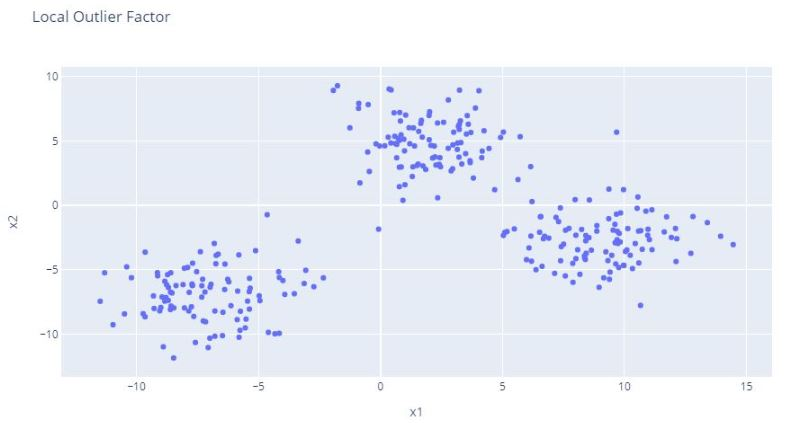

Use the *LocalOutlierFactor* class from the *scikit-learn* to analyze outliers in the given dataset. Set the following arguments:

* `n_neighbours=20`

As a reminder, 1 is the normal element, -1 is the outlier. Assign a new column to the df DataFrame named `'lof'` that stores information whether a given sample is a normal or an outlier. In response, print the first ten rows of the df DataFrame to the console

In [34]:
np.random.seed(42)
df = pd.read_csv('blobs.csv')
data = df.values

In [35]:
df.head(5)

,x2,x1
0,-7.798349,-8.579798
1,-8.600454,-7.649221
2,-0.864108,6.572599
3,4.204516,4.170723
4,-10.955876,-8.896282


In [38]:
data[:5]

array([[ -7.79834899,  -8.57979833],
       [ -8.60045392,  -7.64922068],
       [ -0.8641078 ,   6.57259883],
       [  4.20451643,   4.17072339],
       [-10.95587626,  -8.89628222]])

In [40]:
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(data)

In [41]:
df['lof'] = y_pred
df.head(5)

,x2,x1,lof
0,-7.798349,-8.579798,1
1,-8.600454,-7.649221,1
2,-0.864108,6.572599,1
3,4.204516,4.170723,1
4,-10.955876,-8.896282,1


### **Exercise 80**

Find the number of outliers in this dataset. In response, print the result to the console as shown below.

In [42]:
df['lof'].value_counts()

 1    281
-1     19
Name: lof, dtype: int64